# Part 1 : Data Preparation

# Data Import 

In [3]:
import pandas as pd
from sqlalchemy import create_engine, Table, Column, Integer, String, Float, MetaData, Date
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.exc import SQLAlchemyError
import numpy as np

In [172]:
customer = pd.read_csv('customers.csv')
customer.head()

,customer_id,name,email
0,8,customer three,customer3@gmail.com
1,9,Shafran Naizer,mshafran13@gmail.com
2,10,Isuri Liyanage,liyanage.isukavi@gmail.com
3,12,Shafran Naizer,shafran@ieee.org
4,13,sss ss,ss@ieee.org


In [173]:
order = pd.read_csv('order.csv')
order.head()

,id,display_order_id,total_amount,created_at,customer_id
0,13392,YTFA,425,2024-10-14 15:12:43,1251.0
1,13393,N1U7,1650,2024-10-14 15:17:25,1251.0
2,13394,PADV,1365,2024-10-14 17:02:16,468.0
3,13395,OKVW,525,2024-10-14 17:03:36,1251.0
4,13396,2G3Q,525,2024-10-14 17:04:49,468.0


In [174]:
customer.isnull().sum()

customer_id     0
name            6
email          18
dtype: int64

In [175]:
order.isnull().sum()

id                    0
display_order_id     36
total_amount          0
created_at            0
customer_id         125
dtype: int64

In [176]:
#fill null values in customer table 
customer['name'].fillna("unknown", inplace=True)
customer['email'].fillna(np.nan, inplace=True)

C:\Users\Divanka\AppData\Local\Temp\ipykernel_10808\905991110.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer['name'].fillna("unknown", inplace=True)
C:\Users\Divanka\AppData\Local\Temp\ipykernel_10808\905991110.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [177]:
customer.isnull().sum()

customer_id     0
name            0
email          18
dtype: int64

In [178]:
#fill null values in order table 
order['customer_id'].fillna(np.nan, inplace=True)
#only filled customer id column, because that feature should be included in database table(order)

C:\Users\Divanka\AppData\Local\Temp\ipykernel_10808\1493541886.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order['customer_id'].fillna(np.nan, inplace=True)


In [179]:
order.isnull().sum()

id                    0
display_order_id     36
total_amount          0
created_at            0
customer_id         125
dtype: int64

In [180]:
customer['email']

0                        customer3@gmail.com
1                       mshafran13@gmail.com
2                 liyanage.isukavi@gmail.com
3                           shafran@ieee.org
4                                ss@ieee.org
                        ...                 
1109    alex.johnson+1729082517724@gmail.com
1110                 dominguhewa98@gmail.com
1111           liyanage.isukavi+22@gmail.com
1112          red.test506+99654648@gmail.com
1113                 lpw.ratnayake@gmail.com
Name: email, Length: 1114, dtype: object

In [181]:
#remover irrelevant columns 
customers= customer.drop(columns=['email'])
customers

,customer_id,name
0,8,customer three
1,9,Shafran Naizer
2,10,Isuri Liyanage
3,12,Shafran Naizer
4,13,sss ss
...,...,...
1109,1270,Alex Johnson
1110,1271,Dinuka Kaveen Dominguhewa
1111,1272,K L
1112,1273,fdv dfvfd


In [182]:
#remove irrelevant columns in order table
orders= order.drop(columns=['display_order_id'])
orders

,id,total_amount,created_at,customer_id
0,13392,425,2024-10-14 15:12:43,1251.0
1,13393,1650,2024-10-14 15:17:25,1251.0
2,13394,1365,2024-10-14 17:02:16,468.0
3,13395,525,2024-10-14 17:03:36,1251.0
4,13396,525,2024-10-14 17:04:49,468.0
...,...,...,...,...
8112,814,450000,2022-03-03 06:24:59,58.0
8113,826,125000,2022-03-03 10:17:47,58.0
8114,830,260000,2022-03-03 11:47:15,58.0
8115,845,125000,2022-03-04 01:30:58,58.0


In [183]:
customers = customers.rename(columns={'name':'customer_name'})

In [184]:
customers.head()

,customer_id,customer_name
0,8,customer three
1,9,Shafran Naizer
2,10,Isuri Liyanage
3,12,Shafran Naizer
4,13,sss ss


In [185]:
orders.head()

,id,total_amount,created_at,customer_id
0,13392,425,2024-10-14 15:12:43,1251.0
1,13393,1650,2024-10-14 15:17:25,1251.0
2,13394,1365,2024-10-14 17:02:16,468.0
3,13395,525,2024-10-14 17:03:36,1251.0
4,13396,525,2024-10-14 17:04:49,468.0


In [186]:
orders=orders.rename(columns={'id':'order_id',
                             'created_at':'order_date'})
orders.head()

,order_id,total_amount,order_date,customer_id
0,13392,425,2024-10-14 15:12:43,1251.0
1,13393,1650,2024-10-14 15:17:25,1251.0
2,13394,1365,2024-10-14 17:02:16,468.0
3,13395,525,2024-10-14 17:03:36,1251.0
4,13396,525,2024-10-14 17:04:49,468.0


In [187]:
# Convert order_date to datetime and extract only the date
orders['order_date'] = pd.to_datetime(orders['order_date']).dt.date
orders.head()

,order_id,total_amount,order_date,customer_id
0,13392,425,2024-10-14,1251.0
1,13393,1650,2024-10-14,1251.0
2,13394,1365,2024-10-14,468.0
3,13395,525,2024-10-14,1251.0
4,13396,525,2024-10-14,468.0


In [1]:
# Define your MySQL connection parameters
MYSQL_USER = 'sql12740691'
MYSQL_PASSWORD = 'xnGri65wVa'
MYSQL_HOST = 'sql12.freesqldatabase.com'
MYSQL_PORT = 3306
MYSQL_DATABASE = 'sql12740691'

In [4]:
# Create a MySQL database connection using SQLAlchemy
engine = create_engine(f'mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}')

In [5]:
try:
    # Create a connection to the MySQL database
    engine = create_engine(f'mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}')
    connection = engine.connect()  # Establish the connection
    print("Connection successful!")
except SQLAlchemyError as e:
    print(f"Error connecting to the database: {e}")

Connection successful!


# Data Analysis - Machine Learning Model

# Preprare data - caluculate total orders & revenue 

In [193]:
order_details = pd.read_sql("SELECT customer_id, order_id, total_amount FROM orders", con=engine)

#calculate total orders and revenue 
summary = orders.groupby("customer_id").agg(
    total_orders=('order_id', 'count'),
    total_amount=('total_amount', 'sum')
).reset_index()

summary

,customer_id,total_orders,total_amount
0,8.0,11,27500
1,9.0,2,6797
2,10.0,12,31200
3,12.0,7,17200
4,14.0,112,384436
...,...,...,...
657,100004.0,6,8400
658,100005.0,5,10800
659,100009.0,7,5600
660,100010.0,3,8700


In [194]:
#define repeat purchaser 
summary["repeat_purchaser"] = summary["total_orders"].apply(lambda x: "1" if x > 1 else "0")

In [195]:
summary

,customer_id,total_orders,total_amount,repeat_purchaser
0,8.0,11,27500,1
1,9.0,2,6797,1
2,10.0,12,31200,1
3,12.0,7,17200,1
4,14.0,112,384436,1
...,...,...,...,...
657,100004.0,6,8400,1
658,100005.0,5,10800,1
659,100009.0,7,5600,1
660,100010.0,3,8700,1


# check class balance before train the model

In [196]:
x= summary.drop(columns=['repeat_purchaser'])
y = summary['repeat_purchaser']

In [197]:
y.value_counts()

repeat_purchaser
0    527
1    135
Name: count, dtype: int64

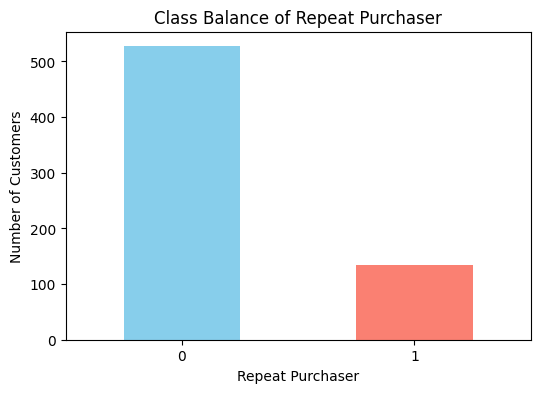

In [198]:
import matplotlib.pyplot as plt

class_balance = summary["repeat_purchaser"].value_counts()

# Plot the class balance
plt.figure(figsize=(6, 4))
class_balance.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Balance of Repeat Purchaser")
plt.xlabel("Repeat Purchaser")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()

In [199]:
smote = SMOTE(random_state=42)

In [200]:
X_resampled, y_resampled = smote.fit_resample(x, y)

In [201]:
y_resampled.value_counts()

repeat_purchaser
1    527
0    527
Name: count, dtype: int64

In [202]:
# Combine the resampled features and target back into a DataFrame
df_resampled = pd.DataFrame(X_resampled)
df_resampled['repeat_purchaser'] = y_resampled

In [203]:
df_resampled

,customer_id,total_orders,total_amount,repeat_purchaser
0,8.000000,11,27500,1
1,9.000000,2,6797,1
2,10.000000,12,31200,1
3,12.000000,7,17200,1
4,14.000000,112,384436,1
...,...,...,...,...
1049,26.574959,7,17571,1
1050,100008.243381,3,8612,1
1051,77.851941,694,2770860,1
1052,509.289205,27,13125,1


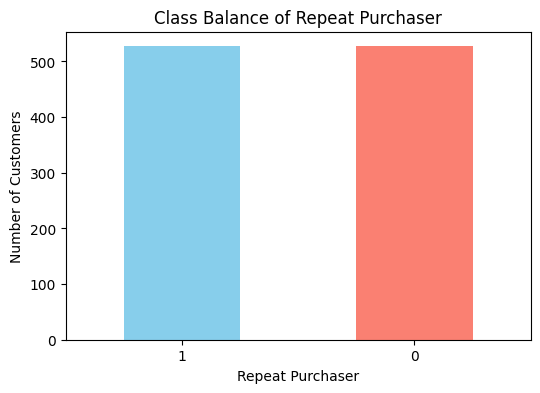

In [204]:
class_balance = df_resampled["repeat_purchaser"].value_counts()

# Plot the class balance
plt.figure(figsize=(6, 4))
class_balance.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Balance of Repeat Purchaser")
plt.xlabel("Repeat Purchaser")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()

In [205]:
#define x and y
x = df_resampled.drop(columns=['repeat_purchaser'])
y = df_resampled['repeat_purchaser']

# Model training 

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [207]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [208]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [209]:
# Predict on the training data
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the testing data
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 1.0


In [210]:
#save the  model
import pickle
filename = 'lr_model.pkl'
pickle.dump(model, open(filename, 'wb'))